In [12]:
import tensorflow as tf # install tensorflow

In [13]:
# define the image size and batch size
img_size = (40, 40)
batch_size = 32

# Path to your dataset folder 


data_dir = "C:/Users/EMIL/Desktop/Rezised 40X40 dataset"

In [14]:
# use image_dataset_from_directory to load the data and split it into training and testing sets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=img_size,
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=img_size,
    batch_size=batch_size)

Found 18135 files belonging to 8 classes.
Using 14508 files for training.
Found 18135 files belonging to 8 classes.
Using 3627 files for validation.


In [15]:
# inspect the class names and number of classes
class_names = train_ds.class_names
num_classes = len(class_names)
print('Class names:', class_names)
print('Number of classes:', num_classes)

Class names: ['0', '1', '2', '3', '4', '5', '6', '7']
Number of classes: 8


In [16]:
# convert images to grayscale
def grayscale(image, label):
    image = tf.image.rgb_to_grayscale(image)
    return image, label

train_ds = train_ds.map(grayscale)
val_ds = val_ds.map(grayscale)

# normalize pixel values to be between 0 and 1
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
val_ds = val_ds.map(lambda x, y: (x / 255.0, y))

In [17]:
# create the neural network
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(40, 40, 1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 4, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# The neural network architecture consists of sequential layers, where the output of one layer is passed as input to the next layer.

# The first layer is a convolutional layer with 16 filters of size 3x3, followed by a ReLU activation function. 
# The input shape of the layer is (40, 40, 1), which means that the layer expects input images of size 40x40 with one color channel (grayscale).

# The second layer is a max pooling layer that reduces the spatial dimensions of the output from the previous layer by taking the maximum value in each 2x2 window.

# The third layer is another convolutional layer with 32 filters of size 3x3, followed by a ReLU activation function.

# The fourth layer is another max pooling layer.

# The fifth layer is a flatten layer that flattens the output from the previous layer into a 1D vector.

# The sixth layer is a dense layer with 64 units and a ReLU activation function.

# The seventh and final layer is a dense layer with num_classes units and a softmax activation function, which produces the predicted class probabilities for the input image.

In [18]:
# For visualizing the model

from keras.utils.vis_utils import plot_model
plot_model(model, 
           to_file='model.png',
           show_shapes=True,
           show_dtype=False,
           show_layer_names=True,
           rankdir='TB',
           expand_nested=False,
           dpi=300,
           layer_range=None,
           show_layer_activations=True
          )

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [19]:
# compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
# train the model
history= model.fit(train_ds, validation_data=val_ds, epochs=20)

Epoch 1/20


c:\Users\EMIL\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


454/454 [==============================] - 149s 313ms/step - loss: 0.9073 - accuracy: 0.6967 - val_loss: 0.2827 - val_accuracy: 0.9250
Epoch 2/20
454/454 [==============================] - 25s 55ms/step - loss: 0.1948 - accuracy: 0.9462 - val_loss: 0.1610 - val_accuracy: 0.9534
Epoch 3/20
454/454 [==============================] - 27s 59ms/step - loss: 0.1100 - accuracy: 0.9692 - val_loss: 0.1084 - val_accuracy: 0.9688
Epoch 4/20
454/454 [==============================] - 28s 62ms/step - loss: 0.0644 - accuracy: 0.9831 - val_loss: 0.0969 - val_accuracy: 0.9705
Epoch 5/20
454/454 [==============================] - 130s 286ms/step - loss: 0.0388 - accuracy: 0.9899 - val_loss: 0.0882 - val_accuracy: 0.9746
Epoch 6/20
454/454 [==============================] - 167s 361ms/step - loss: 0.0333 - accuracy: 0.9902 - val_loss: 0.0900 - val_accuracy: 0.9755
Epoch 7/20
454/454 [==============================] - 108s 232ms/step - loss: 0.0184 - accuracy: 0.9953 - val_loss: 0.0902 - val_accuracy: 0.

In [21]:
loss, accuracy = model.evaluate(val_ds, verbose=0)

print(f'Testing accuracy: {(accuracy*100):.2f}%')

Testing accuracy: 98.32%


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 38, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 19, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 128)               5

In [23]:
# model.save('MP.h5')

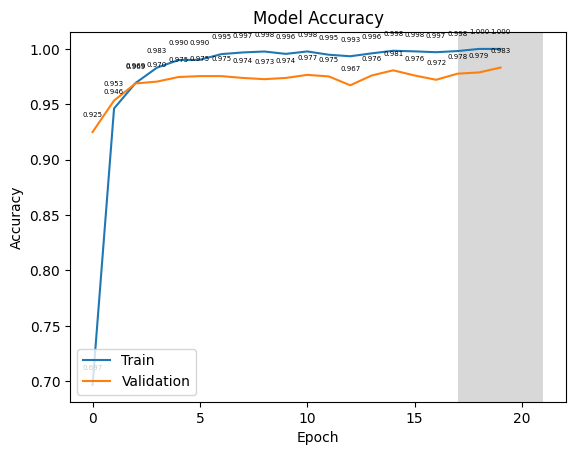

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower left')

# Add annotations to display y-axis values at the top of each point
for i, acc in enumerate(history.history['accuracy']):
    plt.annotate('{:.3f}'.format(acc), (i, acc), xytext=(0, 10), textcoords='offset points', ha='center', va='bottom', fontsize=5)
for i, val_acc in enumerate(history.history['val_accuracy']):
    plt.annotate('{:.3f}'.format(val_acc), (i, val_acc), xytext=(0, 10), textcoords='offset points', ha='center', va='bottom', fontsize=5)

# Find epoch with highest validation accuracy
best_epoch = np.argmax(history.history['val_accuracy'])

# Highlight region around best epoch
plt.axvspan(best_epoch - 2, best_epoch + 2, facecolor='gray', alpha=0.3)    

plt.show()


1/1 [==============================] - 0s 29ms/step


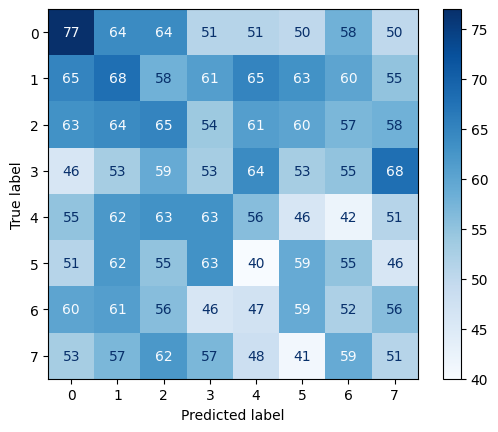

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

# Convert one-hot encoded labels to class indices
val_labels = np.concatenate([y.numpy() for _, y in val_ds])
y_pred = []
for x, _ in val_ds:
    y_pred.append(model.predict(x))
y_pred = np.concatenate(y_pred)
y_pred = np.argmax(y_pred, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(val_labels, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [32]:
from sklearn.metrics import precision_score, recall_score
import numpy as np

precision = np.diag(cm) / np.sum(cm, axis=0)
recall = np.diag(cm) / np.sum(cm, axis=1)

# Print precision and recall for each class
for i, class_name in enumerate(class_names):
    print(f"{class_name}:\t precision = {precision[i]:.4f},\t recall = {recall[i]:.4f}")

0:	 precision = 0.1638,	 recall = 0.1656
1:	 precision = 0.1385,	 recall = 0.1374
2:	 precision = 0.1349,	 recall = 0.1349
3:	 precision = 0.1183,	 recall = 0.1175
4:	 precision = 0.1296,	 recall = 0.1279
5:	 precision = 0.1369,	 recall = 0.1369
6:	 precision = 0.1187,	 recall = 0.1190
7:	 precision = 0.1172,	 recall = 0.1192
